In [4]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mp
# import gaia_tools as gt
import scipy
from scipy.ndimage import gaussian_filter
import astropy.units as u
from astropy.coordinates import SkyCoord
import math
import h5py
import healpy as hp
import pykdgrav3_utils
from pykdgrav3_utils import units
u = units.units(1, 600., verbose=True)

sys.path.append('/mnt/c/gaiaenv/New Py/My_thesis/Modules')
from mock_wake import generate_mock_wake
from rotation_funcs import rotate, angle_finder, rz, ry, rx

dMsolUnit = 1.000000e+00
dKpcUnit = 6.000000e+02
dGasConst =  1150890.1952769116
dErgPerGmUnit =  71.68174956254887
dGmPerCcUnit =  3.1333829769061664e-40
dSecUnit =  2.1867420491060357e+23
dKmPerSecUnit =  8.466507518602276e-05
dComovingGmPerCcUnit =  3.1333829769061664e-40


In [5]:
file = '/mnt/c/Data/Praktika_data/dm_sim.00001.0'

def load_snap_file(path, part_type='PartType1', is_print = False):

    snap_file = h5py.File(path, 'r')
    part_data = snap_file[part_type]

    if(is_print):
        print(f'Loading snapshot: {path.split("/")[-1]}')
        print(f'Selected species: {part_type}')
        print(f'Snap file keys: {snap_file.keys()}')
        print(f'Part type keys: {part_data.keys()}')

    return part_data

In [ ]:
orbitfile = '/mnt/c/Data/Praktika_data/trajlmc.txt'
orbit = pd.read_csv(orbitfile, delimiter = ' ')

In [14]:
orbit.loc[364]

time     -0.28125
x        14.67820
y        33.45690
z       -59.87160
Vx      -40.05390
Vy     -271.83800
Vz       28.48570
Name: 364, dtype: float64

In [25]:
d_orbit = np.sqrt(orbit['x']**2 + orbit['y']**2 + orbit['z']**2)
loc70 = np.isclose(d_orbit, 70.0, 0.01)
70 - d_orbit[loc70]

364   -0.138593
423    0.124087
dtype: float64

In [28]:
v70 = orbit['Vx'][loc70].values[0], orbit['Vy'][loc70].values[0], orbit['Vz'][loc70].values[0]

In [6]:
snap_stars = load_snap_file(file, part_type='PartType4', is_print=True)
star_coord = snap_stars['Coordinates'][:]*u.dKpcUnit

Loading snapshot: dm_sim.00001.0
Selected species: PartType4
Snap file keys: <KeysViewHDF5 ['Cosmology', 'Header', 'Parameters', 'PartType1', 'PartType4', 'Units']>
Part type keys: <KeysViewHDF5 ['Coordinates', 'GroupID', 'Masses', 'ParticleIDs', 'Potential', 'Softening', 'StellarFormationTime', 'Velocities']>


(array([[5265., 5288., 5235., ..., 5291., 5287., 5216.],
        [5264., 5224., 5291., ..., 5314., 5265., 5199.],
        [5253., 5256., 5332., ..., 5313., 5273., 5371.],
        ...,
        [5224., 5295., 5261., ..., 5291., 5350., 5227.],
        [5239., 5321., 5246., ..., 5314., 5285., 5278.],
        [5233., 5257., 5330., ..., 5291., 5249., 5247.]]),
 array([-2.99999999e+02, -2.87999999e+02, -2.76000000e+02, -2.64000000e+02,
        -2.52000000e+02, -2.40000001e+02, -2.28000001e+02, -2.16000001e+02,
        -2.04000002e+02, -1.92000002e+02, -1.80000002e+02, -1.68000003e+02,
        -1.56000003e+02, -1.44000003e+02, -1.32000004e+02, -1.20000004e+02,
        -1.08000004e+02, -9.60000048e+01, -8.40000051e+01, -7.20000055e+01,
        -6.00000058e+01, -4.80000062e+01, -3.60000065e+01, -2.40000069e+01,
        -1.20000072e+01, -7.57314683e-06,  1.19999921e+01,  2.39999917e+01,
         3.59999914e+01,  4.79999910e+01,  5.99999907e+01,  7.19999903e+01,
         8.39999900e+01,  9.5999989

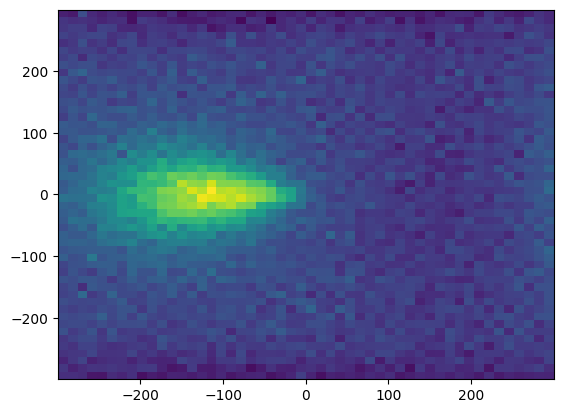

In [10]:
plt.hist2d(star_coord[:,0][::10], star_coord[:,1][::10], bins=50, cmap='viridis')